In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download tawsifurrahman/covid19-radiography-database

 98% 731M/745M [00:04<00:00, 182MB/s]
100% 745M/745M [00:04<00:00, 163MB/s]


In [8]:
! unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [10]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt


In [11]:

!pip install openpyxl

In [13]:
covid_imgs = pd.read_excel("COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid_imgs.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [15]:
normal_images = pd.read_excel("COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [58]:
pneumonia_images = pd.read_excel("COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [62]:
ROOT_DIR = "COVID-19_Radiography_Dataset"
imgs = ['COVID','Normal','Viral Pneumonia']

NEW_DIR = "aug/"

In [63]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

In [65]:
counter = {'COVID':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

# the number of images i have in each class
counter

{'COVID': 3616, 'Normal': 10192, 'Viral Pneumonia': 1345}

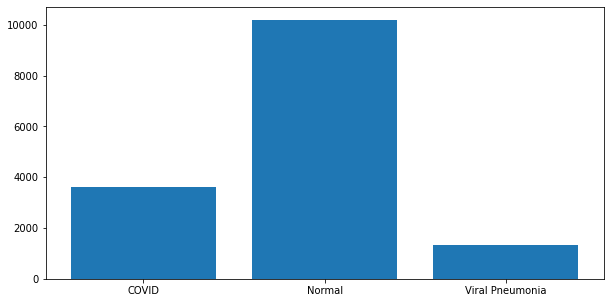

In [66]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()

In [68]:

if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[1]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [72]:
train_path  = "aug/train_test_split/train"
valid_path  = "aug/train_test_split/validation"
test_path   = "aug/train_test_split/test"

In [ ]:
os.listdir('aug/train_test_split/validation/Covid')

In [76]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [77]:
train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    shear_range=0.2)
train = train_data_gen.flow_from_directory(directory=train_path, target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [78]:
validattion_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid = validattion_data_gen.flow_from_directory(directory=valid_path, target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [79]:
test_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test = test_data_gen.flow_from_directory(directory=test_path, target_size=(224,224), shuffle=False)

Found 800 images belonging to 2 classes.


In [80]:
class_type = {0:'Covid',  1 : 'Normal'}

In [81]:
t_img, label = train.next()

In [82]:
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  for im,l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


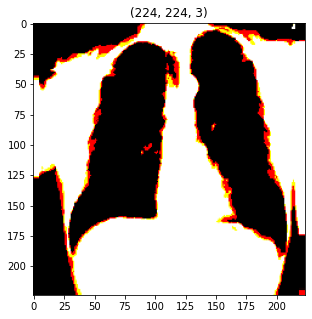

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


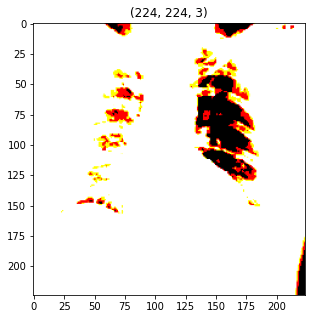

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


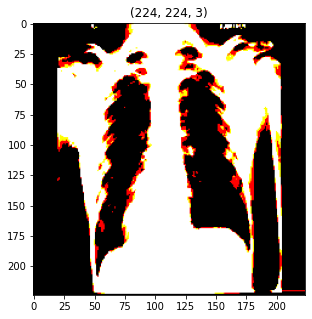

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


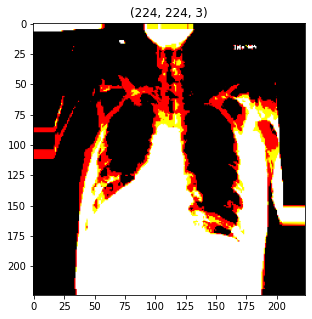

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


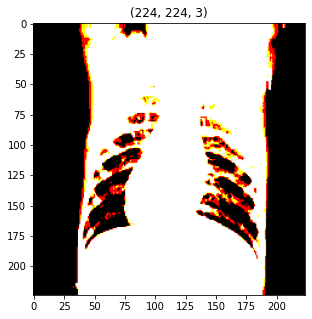

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


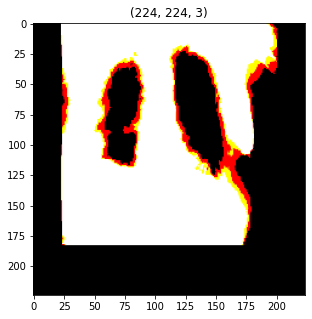

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


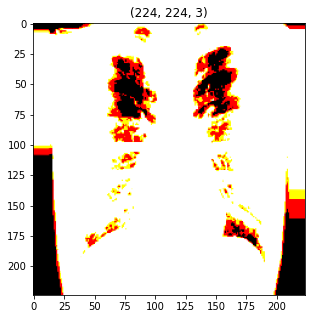

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


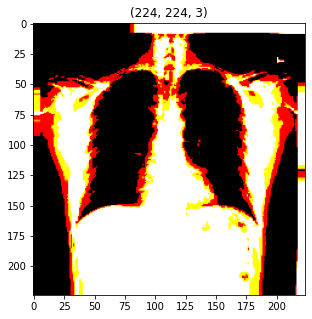

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


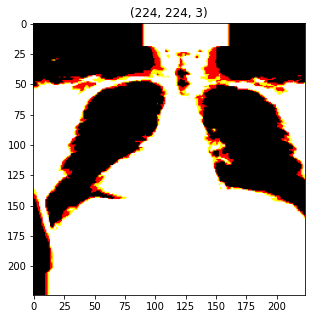

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


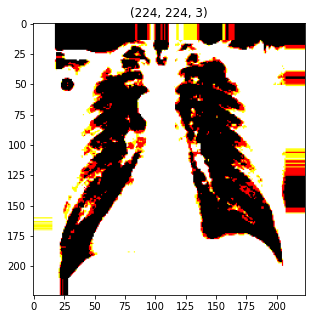

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


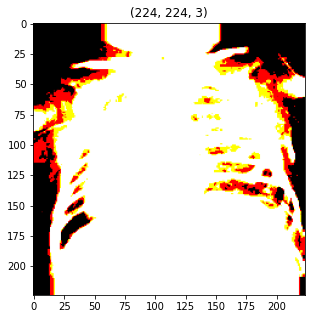

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


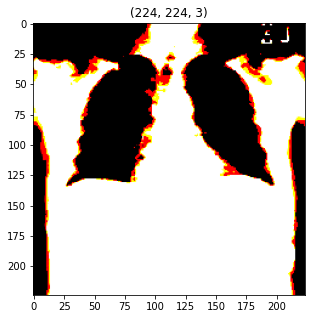

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


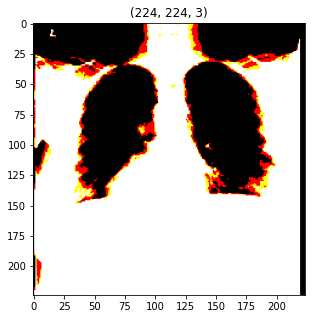

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


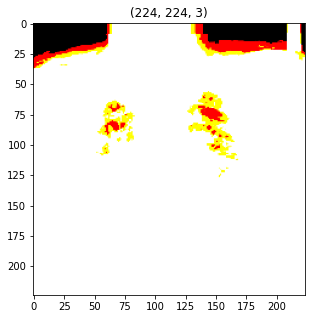

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


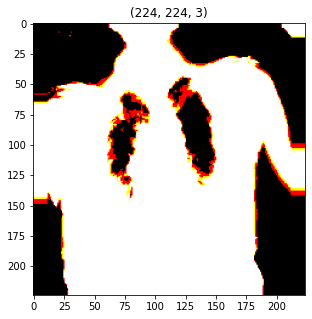

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


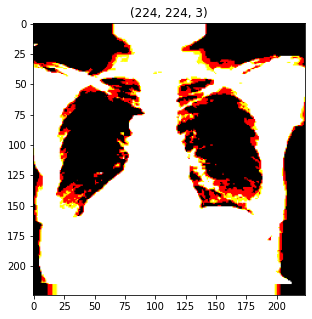

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


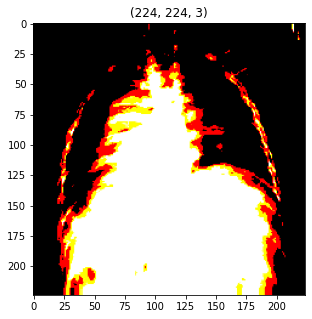

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


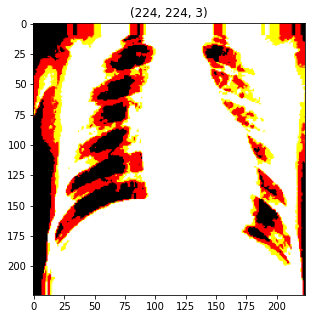

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


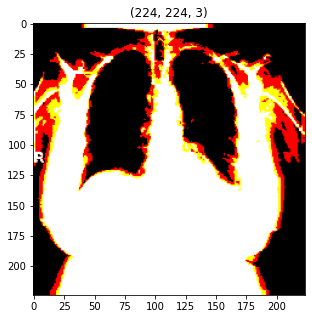

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


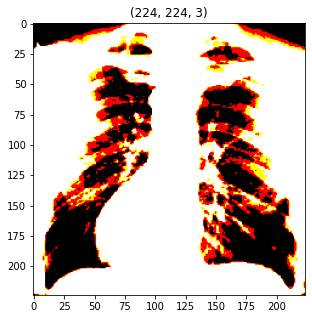

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


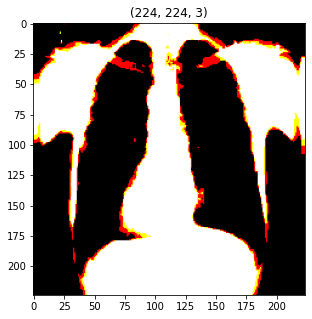

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


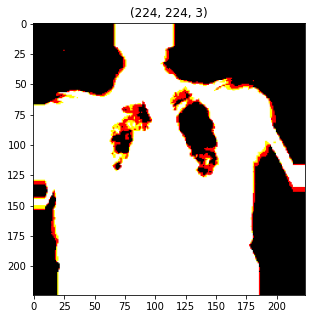

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


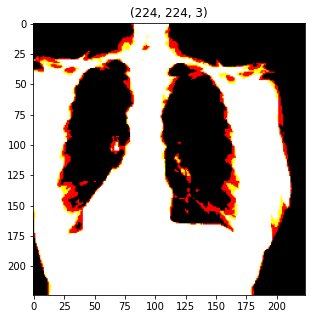

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


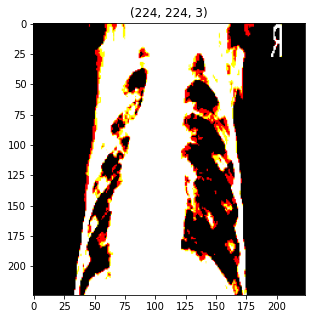

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


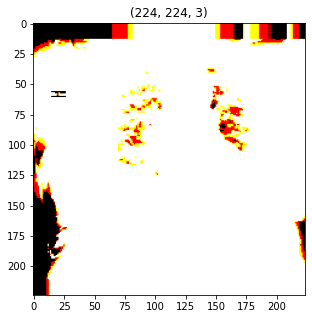

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


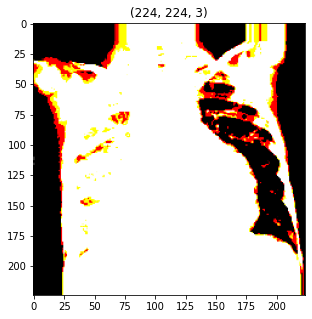

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


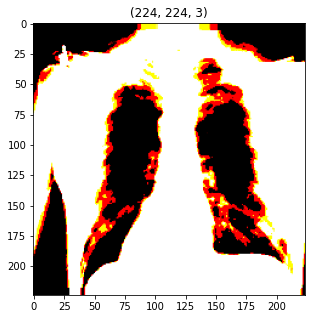

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


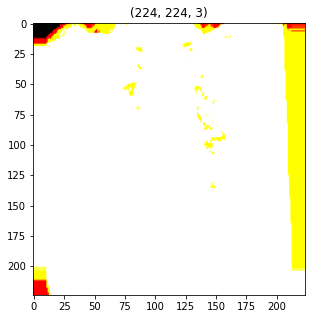

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


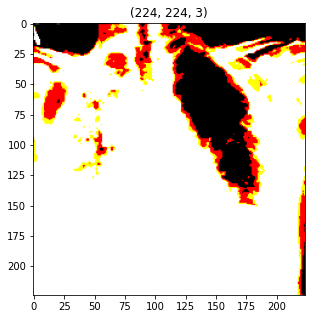

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


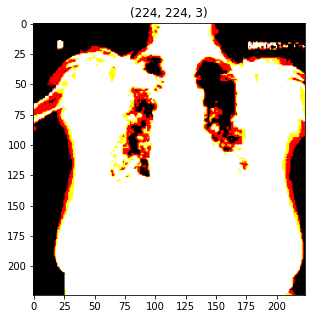

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


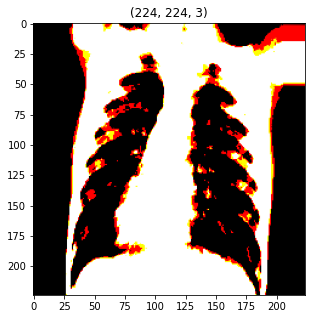

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


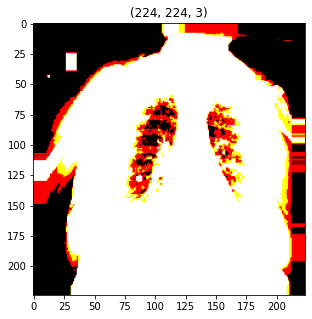

In [83]:
plotImages(t_img, label)

In [85]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Dropout

In [86]:
res  = ResNet50( input_shape=(224,224,3), include_top=False)

94781440/94765736 [==============================] - 2s 0us/step


In [87]:
for layer in res.layers:
  layer.trainable = False

In [88]:
x = Flatten()(res.output)
out = Dense(units=2, activation='sigmoid', name='predictions')(x)


# Creating our model
model = Model(inputs=res.input, outputs=out)

In [89]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [90]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

es  = myCallback()

In [92]:
hist = model.fit(train, steps_per_epoch=10, epochs=30, validation_data=valid, validation_steps=16, callbacks=[es])

Epoch 1/30
10/10 [==============================] - 153s 16s/step - loss: 7.7371 - accuracy: 0.5969 - val_loss: 5.0881 - val_accuracy: 0.7715
Epoch 2/30
10/10 [==============================] - 150s 16s/step - loss: 4.3343 - accuracy: 0.7688 - val_loss: 4.0537 - val_accuracy: 0.8281
Epoch 3/30
10/10 [==============================] - 165s 18s/step - loss: 2.4747 - accuracy: 0.8500 - val_loss: 2.5730 - val_accuracy: 0.8438
Epoch 4/30
10/10 [==============================] - 147s 16s/step - loss: 2.0966 - accuracy: 0.8438 - val_loss: 2.0392 - val_accuracy: 0.8691
Epoch 5/30
10/10 [==============================] - 143s 15s/step - loss: 1.9238 - accuracy: 0.8750 - val_loss: 1.6592 - val_accuracy: 0.8828
Epoch 6/30
10/10 [==============================] - 142s 15s/step - loss: 1.6066 - accuracy: 0.8906 - val_loss: 1.6723 - val_accuracy: 0.8809
Epoch 7/30
10/10 [==============================] - 143s 15s/step - loss: 1.6920 - accuracy: 0.8750 - val_loss: 3.0170 - val_accuracy: 0.8184
Epoch 

In [93]:
model.save("covid-resnet50")

INFO:tensorflow:Assets written to: covid-resnet50/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [96]:
acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc * 100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is = 93.25000047683716 %


In [97]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

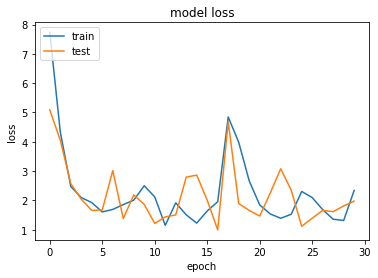

In [98]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

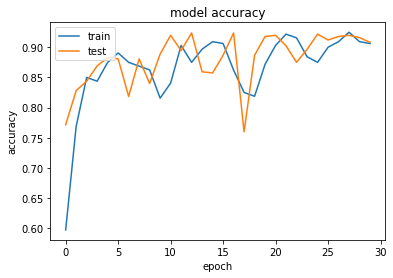

In [99]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(test.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(test.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix
[[454  46]
 [  8 292]]
Classification Report
              precision    recall  f1-score   support

      normal       0.98      0.91      0.94       500
       covid       0.86      0.97      0.92       300

    accuracy                           0.93       800
   macro avg       0.92      0.94      0.93       800
weighted avg       0.94      0.93      0.93       800



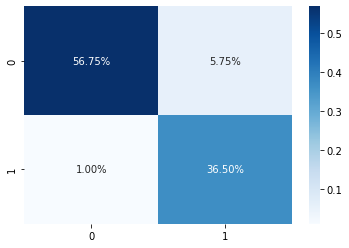

In [102]:
import seaborn as sns
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')